In [1]:
! pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.7 MB/s eta 0:00:00


In [2]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=19fb56fa9ce56996e15a603718046a4b0f54bcbc57757efe411015ce4920a688
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [3]:
import unidecode
import pandas as pd
import re
import time
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import timeit
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
stoplist = stopwords.words('english')
stoplist = set(stoplist)
spell = Speller(lang='en')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [7]:
#df=pd.read_csv("/content/zomato_reviews.csv")
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
df #Dataframe that has to be processed

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [8]:

print("No. of rows",df.shape[0])
print("No. of columns",df.shape[1])
print("features",df.columns)

No. of rows 1000
No. of columns 2
features Index(['Review', 'Liked'], dtype='object')


<Axes: xlabel='Liked', ylabel='count'>

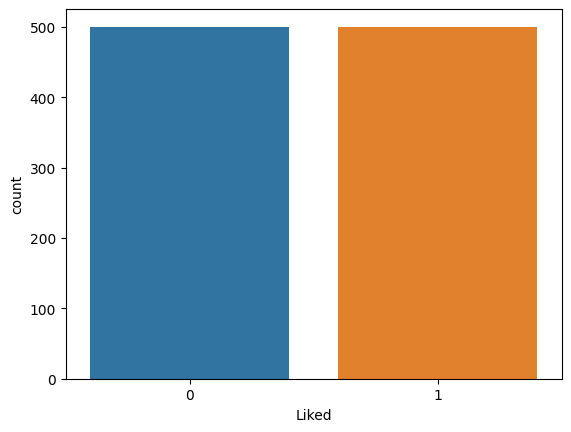

In [9]:
sns.countplot(x='Liked',data=df)

**Preprocessing**

In [10]:

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Review    0
Liked     0
dtype: int64

In [11]:
df.describe()
df=df.dropna() #Drop null values
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [12]:
type(df['Review'])


pandas.core.series.Series

In [13]:
review_list=df['Review'].to_list()
review_list

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Highly recommended.',
 'Waitress was a little slow in service.',
 'This place is not worth your time, let alone Vegas.',
 'did not like at all.

**Remove newlines & tabs**

In [14]:
nlines=[]
def remove_newlines(text):
  formatted=text.replace('\n',' ').replace('\\n',' ').replace('\s',' ')
  print(formatted)
  nlines.append(formatted)

for i in review_list:
  print("text:  ",i)
  remove_newlines(i)

text:   Wow... Loved this place.
Wow... Loved this place.
text:   Crust is not good.
Crust is not good.
text:   Not tasty and the texture was just nasty.
Not tasty and the texture was just nasty.
text:   Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
text:   The selection on the menu was great and so were the prices.
The selection on the menu was great and so were the prices.
text:   Now I am getting angry and I want my damn pho.
Now I am getting angry and I want my damn pho.
text:   Honeslty it didn't taste THAT fresh.)
Honeslty it didn't taste THAT fresh.)
text:   The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
text:   The fries were great too.
The fries were great too.
text:   A grea

**Strip HTML tags**

In [15]:

stripped_tags=[]
def strip_htmltags(text):
  soup=BeautifulSoup(text,'html.parser')
  #print(soup)
  strip_text = soup.get_text(separator=" ")
  print(strip_text)
  stripped_tags.append(strip_text)
for i in nlines:
  print("text:  ",i)
  strip_htmltags(i)


text:   Wow... Loved this place.
Wow... Loved this place.
text:   Crust is not good.
Crust is not good.
text:   Not tasty and the texture was just nasty.
Not tasty and the texture was just nasty.
text:   Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
text:   The selection on the menu was great and so were the prices.
The selection on the menu was great and so were the prices.
text:   Now I am getting angry and I want my damn pho.
Now I am getting angry and I want my damn pho.
text:   Honeslty it didn't taste THAT fresh.)
Honeslty it didn't taste THAT fresh.)
text:   The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
text:   The fries were great too.
The fries were great too.
text:   A grea

<ipython-input-15-456fc95abc6f>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text,'html.parser')


Never again will I be dining at this place!
Never again will I be dining at this place!
text:   The food was excellent and service was very good.
The food was excellent and service was very good.
text:   Good beer & drink selection and good food selection.
Good beer & drink selection and good food selection.
text:   Please stay away from the shrimp stir fried noodles.
Please stay away from the shrimp stir fried noodles.
text:   The potato chip order was sad... I could probably count how many chips were in that box and it was probably around 12.
The potato chip order was sad... I could probably count how many chips were in that box and it was probably around 12.
text:   Food was really boring.
Food was really boring.
text:   Good Service-check!
Good Service-check!
text:   This greedy corporation will NEVER see another dime from me!
This greedy corporation will NEVER see another dime from me!
text:   Will never, ever go back.
Will never, ever go back.
text:   As much as I'd like to go ba

**Remove links**

In [16]:
rem_links=[]
def remove_links(text):
  https=re.sub(r'http\S+','',text)
  com=re.sub(r'\[A-Za-z]*\.com',' ',https)
  rem_links.append(com)

for i in stripped_tags:
  print("text:  ",i)
  remove_links(i)

text:   Wow... Loved this place.
text:   Crust is not good.
text:   Not tasty and the texture was just nasty.
text:   Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
text:   The selection on the menu was great and so were the prices.
text:   Now I am getting angry and I want my damn pho.
text:   Honeslty it didn't taste THAT fresh.)
text:   The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
text:   The fries were great too.
text:   A great touch.
text:   Service was very prompt.
text:   Would not go back.
text:   The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
text:   I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
text:   I was disgusted because I was pretty sure that was human hair.
text:   I was shocked because no signs indicate cash only.
text:   Highly recommended.
text:   Waitress was a little slow in service.
text: 

**Remove white spaces**

In [17]:
rwhites=[]
def remove_whitespaces(text):
  whitespace=re.sub(r'\s+',' ',text)
  text=whitespace.replace('?',' ? ').replace(')',') ')
  rwhites.append(text)
for i in rem_links:
  print("text:  ",i)
  remove_whitespaces(i)

text:   Wow... Loved this place.
text:   Crust is not good.
text:   Not tasty and the texture was just nasty.
text:   Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
text:   The selection on the menu was great and so were the prices.
text:   Now I am getting angry and I want my damn pho.
text:   Honeslty it didn't taste THAT fresh.)
text:   The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
text:   The fries were great too.
text:   A great touch.
text:   Service was very prompt.
text:   Would not go back.
text:   The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
text:   I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
text:   I was disgusted because I was pretty sure that was human hair.
text:   I was shocked because no signs indicate cash only.
text:   Highly recommended.
text:   Waitress was a little slow in service.
text: 

**Remove Accented characters**

In [18]:
acc=[]
def accented_characters_removal(text):

    text = unidecode.unidecode(text)
    acc.append(text)
for i in rwhites:
  print("text:  ",i)
  accented_characters_removal(i)
print(len(acc))

text:   Wow... Loved this place.
text:   Crust is not good.
text:   Not tasty and the texture was just nasty.
text:   Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
text:   The selection on the menu was great and so were the prices.
text:   Now I am getting angry and I want my damn pho.
text:   Honeslty it didn't taste THAT fresh.) 
text:   The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
text:   The fries were great too.
text:   A great touch.
text:   Service was very prompt.
text:   Would not go back.
text:   The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
text:   I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
text:   I was disgusted because I was pretty sure that was human hair.
text:   I was shocked because no signs indicate cash only.
text:   Highly recommended.
text:   Waitress was a little slow in service.
text:

**Case conversion**

In [19]:
lower=[]
def lower_casing_text(text):

    # Convert text to lower case
    # lower() - It converts all upperase letter of given string to lowercase.
    text = text.lower()
    lower.append(text)
for txt in acc:
  lower_casing_text(txt)
print(lower)

['wow... loved this place.', 'crust is not good.', 'not tasty and the texture was just nasty.', 'stopped by during the late may bank holiday off rick steve recommendation and loved it.', 'the selection on the menu was great and so were the prices.', 'now i am getting angry and i want my damn pho.', "honeslty it didn't taste that fresh.) ", 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.', 'the fries were great too.', 'a great touch.', 'service was very prompt.', 'would not go back.', 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced.', 'i tried the cape cod ravoli, chicken, with cranberry...mmmm!', 'i was disgusted because i was pretty sure that was human hair.', 'i was shocked because no signs indicate cash only.', 'highly recommended.', 'waitress was a little slow in service.', 'this place is not worth your time, let alone vegas.', 'did not like at all.', 'the burrittos 

**Reduce repeated characters and punctuations**

In [20]:
red_repitition=[]
def reducing_repeatation(text):

    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)

    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text)

    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')

    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)

    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    red_repitition.append(Final_Formatted)
for txt in lower:
  reducing_repeatation(txt)
print(red_repitition)


['wow. loved this place.', 'crust is not good.', 'not tasty and the texture was just nasty.', 'stopped by during the late may bank holiday off rick steve recommendation and loved it.', 'the selection on the menu was great and so were the prices.', 'now i am getting angry and i want my damn pho.', "honeslty it didn't taste that fresh.) ", 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.', 'the fries were great too.', 'a great touch.', 'service was very prompt.', 'would not go back.', 'the cashier had no care what so ever on what i had to say it still ended up being wayy overpriced.', 'i tried the cape cod ravoli, chicken, with cranberry.mm!', 'i was disgusted because i was pretty sure that was human hair.', 'i was shocked because no signs indicate cash only.', 'highly recommended.', 'waitress was a little slow in service.', 'this place is not worth your time, let alone vegas.', 'did not like at all.', 'the burrittos blah!',

**Expand contraction words**

In [21]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
}
expanded=[]
# The code for expanding contraction words
def expand_contractions(text, contraction_mapping =  CONTRACTION_MAP):

    # Tokenizing text into tokens.
    list_Of_tokens = text.split(' ')

    for Word in list_Of_tokens:
        # Check whether found word is in dictionary "Contraction Map" or not as a key.
         if Word in CONTRACTION_MAP:
                # If Word is present in both dictionary & list_Of_tokens, replace that word with the key value.
                list_Of_tokens = [item.replace(Word, CONTRACTION_MAP[Word]) for item in list_Of_tokens]

    # Converting list of tokens to String.
    String_Of_tokens = ' '.join(str(e) for e in list_Of_tokens)
    expanded.append(String_Of_tokens)
for txt in  red_repitition:
   expand_contractions(txt)
print(expanded)


['wow. loved this place.', 'crust is not good.', 'not tasty and the texture was just nasty.', 'stopped by during the late may bank holiday off rick steve recommendation and loved it.', 'the selection on the menu was great and so were the prices.', 'now i am getting angry and i want my damn pho.', 'honeslty it did not taste that fresh.) ', 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.', 'the fries were great too.', 'a great touch.', 'service was very prompt.', 'would not go back.', 'the cashier had no care what so ever on what i had to say it still ended up being wayy overpriced.', 'i tried the cape cod ravoli, chicken, with cranberry.mm!', 'i was disgusted because i was pretty sure that was human hair.', 'i was shocked because no signs indicate cash only.', 'highly recommended.', 'waitress was a little slow in service.', 'this place is not worth your time, let alone vegas.', 'did not like at all.', 'the burrittos blah!'

**Remove special charectors**

In [22]:
rem_spcl_char=[]
def removing_special_characters(text):
    Formatted_Text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', text)
    rem_spcl_char.append(Formatted_Text)
for txt in expanded:
  removing_special_characters(txt)
print(rem_spcl_char)

['wow. loved this place.', 'crust is not good.', 'not tasty and the texture was just nasty.', 'stopped by during the late may bank holiday off rick steve recommendation and loved it.', 'the selection on the menu was great and so were the prices.', 'now i am getting angry and i want my damn pho.', 'honeslty it did not taste that fresh.) ', 'the potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.', 'the fries were great too.', 'a great touch.', 'service was very prompt.', 'would not go back.', 'the cashier had no care what so ever on what i had to say it still ended up being wayy overpriced.', 'i tried the cape cod ravoli, chicken, with cranberry.mm!', 'i was disgusted because i was pretty sure that was human hair.', 'i was shocked because no signs indicate cash only.', 'highly recommended.', 'waitress was a little slow in service.', 'this place is not worth your time, let alone vegas.', 'did not like at all.', 'the burrittos blah!'

**Remove stopwords**

In [26]:
global c
c=0
rem_stpwords=[]
stoplist = stopwords.words('english')
stoplist = set(stoplist)
def removing_stopwords(text):
    global c
    text = repr(text)
    # Text without stopwords
    No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stoplist ]
    words_string = ' '.join(No_StopWords)
    if c==0:
       print(words_string)
       c+=1
    rem_stpwords.append(words_string)
for txt in rem_spcl_char:
  removing_stopwords(txt)

print(rem_stpwords[1])

'wow . loved place . '
'crust good . '


In [28]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Lemmatization**

In [29]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
lemmat=[]
def lemmatization(text):

    # Converting words to their root forms
    lemma = [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]
    l=' '.join(lemma)
    lemmat.append(l)
for i in rem_stpwords:
  lemmatization(i)
print(lemmat)

["'wow . love place . '", "'crust good . '", "'not tasty texture nasty . '", "'stopped late may bank holiday rick steve recommendation love . '", "'the selection menu great price . '", "'now get angry want damn pho . '", "'honeslty taste fresh . ) '", "'the potatoes like rubber could tell make ahead time keep warmer . '", "'the fry great . '", "' great touch . '", "'service prompt . '", "'would go back . '", "'the cashier care ever say still end wayy overprice . '", "' try cape cod ravoli , chicken , cranberry.mm ! '", "' disgust pretty sure human hair . '", "' shock sign indicate cash . '", "'highly recommend . '", "'waitress little slow service . '", "'this place worth time , let alone vegas . '", "'did like . '", "'the burrittos blah ! '", "'the food , amaze . '", "'service also cute . '", "' could care less . interior beautiful . '", "'so perform . '", "'that right.the red velvet cake.ohh stuff good . '", "' never bring salad ask . '", "'this hole wall great mexican street tacos , 

**Word cloud**

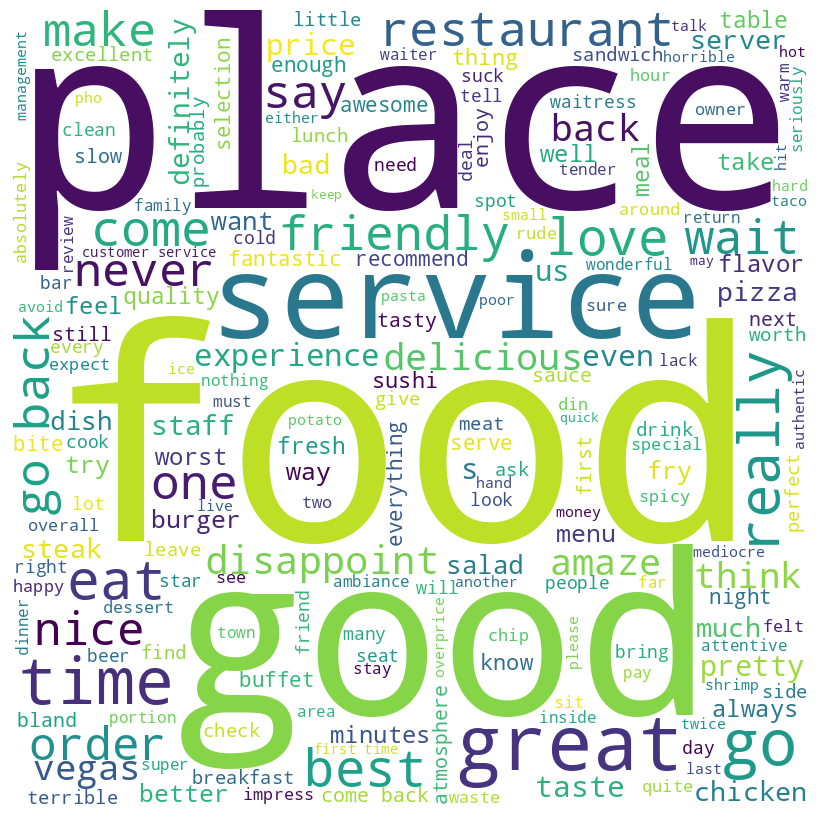

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
stopwords = set(STOPWORDS)
comment_words=""
comment_words += " ".join(lemmat)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [32]:

df['Processed_Title'] = lemmat

In [33]:
df['Processed_Title']

0                                  'wow . love place . '
1                                        'crust good . '
2                           'not tasty texture nasty . '
3      'stopped late may bank holiday rick steve reco...
4                    'the selection menu great price . '
                             ...                        
995                 ' think food flavor texture lack . '
996                           'appetite instantly go . '
997                   'overall impress would go back . '
998    'the whole experience underwhelming , think go...
999    'then , waste enough life , pour salt wind dra...
Name: Processed_Title, Length: 1000, dtype: object

In [34]:
df.head()

,Review,Liked,Processed_Title
0,Wow... Loved this place.,1,'wow . love place . '
1,Crust is not good.,0,'crust good . '
2,Not tasty and the texture was just nasty.,0,'not tasty texture nasty . '
3,Stopped by during the late May bank holiday of...,1,'stopped late may bank holiday rick steve reco...
4,The selection on the menu was great and so wer...,1,'the selection menu great price . '


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['Processed_Title'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


**Train Test Split**

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Liked'], test_size=0.25, random_state=1)
y_train


298    0
160    0
268    1
658    1
996    0
      ..
767    1
72     0
908    0
235    0
37     0
Name: Liked, Length: 750, dtype: int64

**Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Random Forest
mdl=RandomForestClassifier()
clf =mdl.fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, predicted))

Random Forest Accuracy: 0.744


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Processed_Title'])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf,df['Liked'], test_size=0.3, random_state=123)

**Naive Bayes**

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = mdl.fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7133333333333334


**SVM**

In [41]:
from sklearn.svm import SVC
from sklearn import metrics
m=SVC()
# Model Generation Using SVM
clf = m.fit(X_train, y_train)
predicted= clf.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, predicted))

SVM Accuracy: 0.7766666666666666


**Metrics**

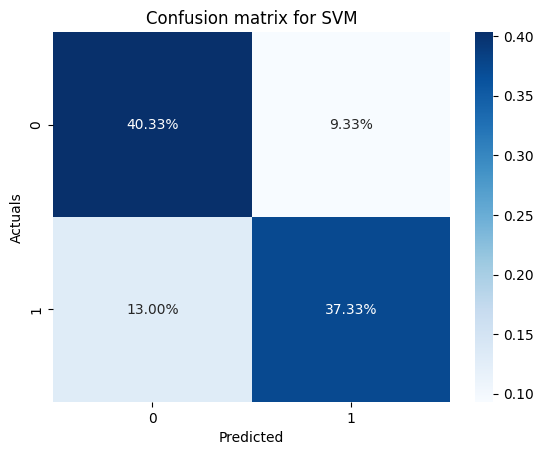

array([[121,  28],
       [ 39, 112]])

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
matrix=confusion_matrix(y_test,predicted)
sns.heatmap(matrix/np.sum(matrix),annot=True,fmt=".2%",cmap="Blues")
plt.ylabel("Actuals")
plt.xlabel("Predicted")
plt.title("Confusion matrix for SVM")
plt.show()
matrix

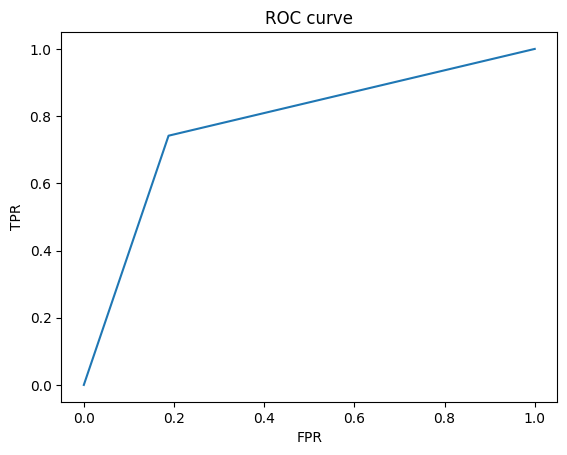

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
fpr,tpr,threshold=roc_curve(y_test,predicted)
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.show()